# Language-agnostic modeling of quality of Wikipedia articles

This notebook provides a tutorial for how to explore the dataset from language-agnostic feature values and quality scores of Wikipedia articles. It has 3 stages:
1. Accessing and extending a sample of the dataset
2. Visualizing features values and qualities scores over time
3. Future Analyses

## 1. Accessing to the data

The dataset of language-agnostic feature values and quality scores of Wikipedia articles available on [Zenodo](https://zenodo.org/records/10495081) is too large to handle with a Jupyter notebook. For that reason, we have prepared a sample with the revisions of English Wikipedia articles maintained by [WikiProject Climate change](https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Climate_change) with the following columns:
- wiki_db: Wikipedia language edition ('enwiki' in this sample).
- page_id: Id of the page (in the corresponding Wikipedia language edition).
- revision_id: Id of the revision (in the corresponding Wikipedia language edition).
- page_length:  Number of bytes of the revision.
- num_refs:  Number of references of the revision.
- num_wikilinks: Number of wikilinks of the revision.
- num_categories: Number of categories of the revision.
- num_media: Number of media files of the revision.
- num_headings: Number of sections of the revision.
- item_id: Id of the page in Wikidata.
- pred_qual: Predicted quality score between 0 and 1.

In [1]:
# TODO: add other libraries here as necessary
import pandas as pd

In [2]:
# Read the zipped CSV
df_revisions = pd.read_csv('https://public-paws.wmcloud.org/User:Pablo%20(WMF)/outreachy/round28/features_scores_climatechange_2022.csv.zip')
df_revisions

,wiki_db,page_id,revision_id,revision_timestamp,page_length,num_refs,num_wikilinks,num_categories,num_media,num_headings,item_id,pred_qual
0,enwiki,348869,366664976,2010-06-07T22:45:20Z,10464,11,66,4,2,7,Q1137345,0.557963
1,enwiki,348869,251114181,2008-11-11T15:34:55Z,4049,0,41,4,2,3,Q1137345,0.397999
2,enwiki,348869,712041311,2016-03-26T15:07:18Z,20701,28,84,4,2,10,Q1137345,0.696191
3,enwiki,348869,341876534,2010-02-04T12:02:16Z,10100,11,61,4,2,7,Q1137345,0.554477
4,enwiki,348869,519730962,2012-10-25T09:56:12Z,17858,21,93,4,2,9,Q1137345,0.654836
...,...,...,...,...,...,...,...,...,...,...,...,...
1456207,enwiki,66790245,1069533455,2022-02-02T19:41:20Z,42178,81,118,4,2,14,Q105549782,0.797312
1456208,enwiki,66790245,1007245703,2021-02-17T04:02:02Z,744,1,2,0,0,0,Q105549782,0.139069
1456209,enwiki,66790245,1041821278,2021-09-01T18:18:01Z,5728,9,19,4,0,5,Q105549782,0.401310
1456210,enwiki,66790245,1055285832,2021-11-15T00:29:52Z,34922,80,115,4,1,14,Q105549782,0.770978


In [3]:
row_with_page_id_39 = df_revisions[df_revisions['page_id'] == 39]

if not row_with_page_id_39.empty:
    selected_row = row_with_page_id_39.iloc[0]
    print(selected_row)
else:
    print("No row found with page_id = 39")

wiki_db                             enwiki
page_id                                 39
revision_id                        1001409
revision_timestamp    2003-06-05T17:37:05Z
page_length                             64
num_refs                                 0
num_wikilinks                            0
num_categories                           0
num_media                                0
num_headings                             0
item_id                            Q101038
pred_qual                         0.019076
Name: 1358962, dtype: object


In [4]:
# As mentioned above, pages are English Wikipedia articles maintained by WikiProject Climate change. 
# The id and title of these pages, together with their quality class and importance class can be extracted with the following Quarry query:
# https://quarry.wmcloud.org/query/52210
df_pages = pd.read_csv('https://quarry.wmcloud.org/query/52210/result/latest/0/csv')
df_pages

,page_id,page_title,quality_class,importance_class
0,39,Albedo,B,High
1,627,Agriculture,GA,Low
2,903,Arable_land,C,Low
3,1365,Ammonia,B,Low
4,3201,Attribution_of_recent_climate_change,B,High
...,...,...,...,...
3812,73428116,Anne_Therese_Gennari,Start,Low
3813,73464356,Christopher_Magadza,C,Low
3814,73540566,Britney_Schmidt,C,Low
3815,73569052,Rainwater_harvesting_in_the_Sahel,C,Low


In [5]:
# Both dataframes can be merged to extend metadata of the revisions samples
df_revisions.merge(df_pages, on='page_id')

,wiki_db,page_id,revision_id,revision_timestamp,page_length,num_refs,num_wikilinks,num_categories,num_media,num_headings,item_id,pred_qual,page_title,quality_class,importance_class
0,enwiki,348869,366664976,2010-06-07T22:45:20Z,10464,11,66,4,2,7,Q1137345,0.557963,North_Atlantic_oscillation,Start,Unknown
1,enwiki,348869,251114181,2008-11-11T15:34:55Z,4049,0,41,4,2,3,Q1137345,0.397999,North_Atlantic_oscillation,Start,Unknown
2,enwiki,348869,712041311,2016-03-26T15:07:18Z,20701,28,84,4,2,10,Q1137345,0.696191,North_Atlantic_oscillation,Start,Unknown
3,enwiki,348869,341876534,2010-02-04T12:02:16Z,10100,11,61,4,2,7,Q1137345,0.554477,North_Atlantic_oscillation,Start,Unknown
4,enwiki,348869,519730962,2012-10-25T09:56:12Z,17858,21,93,4,2,9,Q1137345,0.654836,North_Atlantic_oscillation,Start,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426996,enwiki,66790245,1069533455,2022-02-02T19:41:20Z,42178,81,118,4,2,14,Q105549782,0.797312,Build_Back_Better_Plan,C,Mid
1426997,enwiki,66790245,1007245703,2021-02-17T04:02:02Z,744,1,2,0,0,0,Q105549782,0.139069,Build_Back_Better_Plan,C,Mid
1426998,enwiki,66790245,1041821278,2021-09-01T18:18:01Z,5728,9,19,4,0,5,Q105549782,0.401310,Build_Back_Better_Plan,C,Mid
1426999,enwiki,66790245,1055285832,2021-11-15T00:29:52Z,34922,80,115,4,1,14,Q105549782,0.770978,Build_Back_Better_Plan,C,Mid


In [6]:
# creating new data frame for article 348869
revisions_348869 = df_revisions[df_revisions['page_id'] == 348869]

# Filter rows where 'revision_timestamp' is in the year 2020
# df_filtered = df[df['revision_timestamp'].dt.year == 2020]

sorted_df = revisions_348869.sort_values(by='revision_timestamp')
sorted_df['revision_timestamp'] = pd.to_datetime(sorted_df['revision_timestamp'])
print(sorted_df)


    wiki_db  page_id  revision_id        revision_timestamp  page_length  \
330  enwiki   348869      1619043 2003-10-24 21:50:14+00:00           40   
164  enwiki   348869      1619055 2003-10-24 21:53:44+00:00          215   
103  enwiki   348869      1620888 2003-10-24 21:55:16+00:00          293   
157  enwiki   348869      1620894 2003-10-25 03:52:32+00:00          592   
23   enwiki   348869      1620898 2003-10-25 03:54:39+00:00          651   
..      ...      ...          ...                       ...          ...   
329  enwiki   348869   1095172235 2022-06-26 20:37:22+00:00        25213   
162  enwiki   348869   1119481677 2022-11-01 20:46:07+00:00        25217   
307  enwiki   348869   1119481923 2022-11-01 20:47:30+00:00        25221   
75   enwiki   348869   1123607677 2022-11-24 17:25:43+00:00        25899   
149  enwiki   348869   1124925734 2022-12-01 07:18:43+00:00        25899   

     num_refs  num_wikilinks  num_categories  num_media  num_headings  \
330         0 

In [53]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

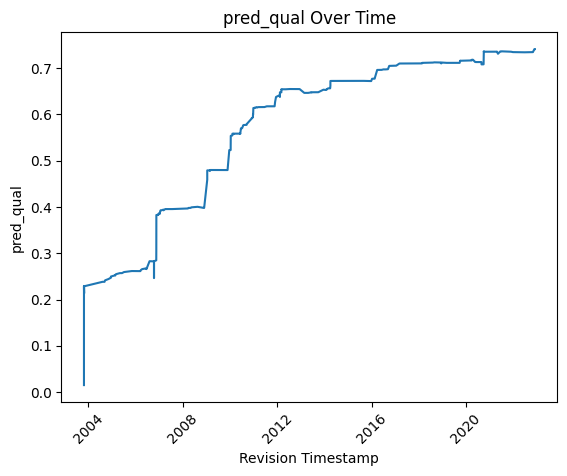

In [54]:

# Plot 'pred_qual' over time
plt.plot(sorted_df['revision_timestamp'], sorted_df['pred_qual'])

# Set labels and title
plt.xlabel('Revision Timestamp')
plt.ylabel('pred_qual')
plt.title('pred_qual Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.show()

In [55]:
# Change this variable to change the year for the plot(graph)
year = 2018

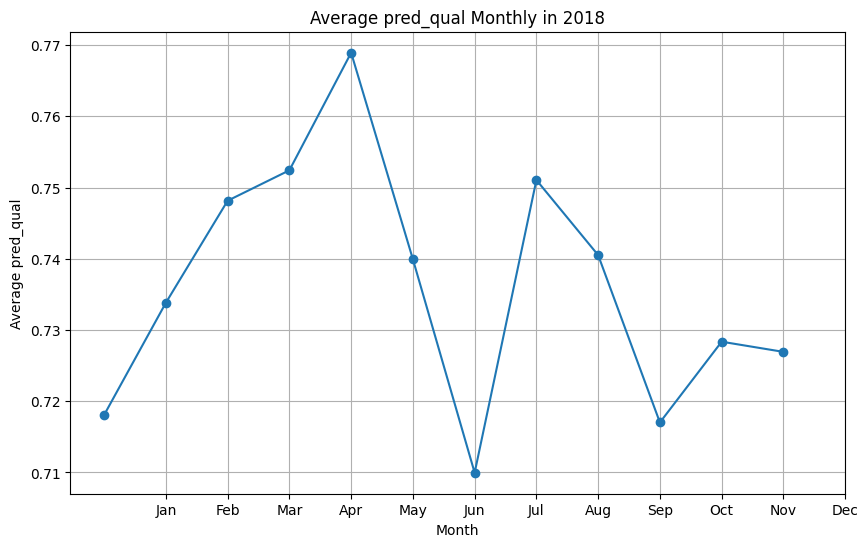

In [56]:
# Convert 'revision_timestamp' column to datetime if it's not already in datetime format
df_revisions['revision_timestamp'] = pd.to_datetime(df_revisions['revision_timestamp'])

# Filter rows where 'revision_timestamp' is in the year 2020
df_revisions_by_year = df_revisions[df_revisions['revision_timestamp'].dt.year == year]

# Group by month and year, and calculate the mean of 'pred_qual' for each month
monthly_data = df_revisions_by_year.groupby([df_revisions_by_year['revision_timestamp'].dt.year, df_revisions_by_year['revision_timestamp'].dt.month])['pred_qual'].mean()

# Plot the monthly data
monthly_data.plot(kind='line', marker='o', figsize=(10, 6))

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average pred_qual')
plt.title('Average pred_qual Monthly in ' +str(year))

# Set x-axis ticks to show month names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show plot
plt.grid(True)
plt.show()

In [57]:
!pip install mwviews 
from mwviews.api import PageviewsClient

In [58]:
# TODO: For any article, you need to use the API to gather pageviews count
# in the time period each revision was made.
# mwviews documentation: https://github.com/mediawiki-utilities/python-mwviews
# user_agent helps identify the request if there's an issue and is best practice
tutorial_label = 'PAWS Language-agnostic quality modeling tutorial (mwapi)'
# NOTE: it is best practice to include a contact email in user agents
# generally this is private information though so do not change it to yours
# if you are working in the PAWS environment or adding to a Github repo
# for Outreachy, you can leave this as Pablo's email or switch it to your Mediawiki username
# e.g., Pablo (WMF) for https://www.mediawiki.org/wiki/User:Pablo_(WMF)
contact_email = 'paragon@wikimedia.org'
p = PageviewsClient(user_agent=f'<{contact_email}> {tutorial_label}')
# See below an example for monthly pageviews of two given articles in 2022
p.article_views('en.wikipedia', ['Albedo', 'Agriculture'], granularity='monthly', start='20220101', end='20221231')

defaultdict(dict,
            {datetime.datetime(2022, 3, 1, 0, 0): {'Albedo': 33142,
              'Agriculture': 163182},
             datetime.datetime(2022, 8, 1, 0, 0): {'Albedo': 27766,
              'Agriculture': 112030},
             datetime.datetime(2022, 10, 1, 0, 0): {'Albedo': 35853,
              'Agriculture': 135306},
             datetime.datetime(2022, 11, 1, 0, 0): {'Albedo': 35815,
              'Agriculture': 147939},
             datetime.datetime(2022, 5, 1, 0, 0): {'Albedo': 31365,
              'Agriculture': 122209},
             datetime.datetime(2022, 7, 1, 0, 0): {'Albedo': 30038,
              'Agriculture': 93480},
             datetime.datetime(2022, 9, 1, 0, 0): {'Albedo': 34701,
              'Agriculture': 149693},
             datetime.datetime(2022, 12, 1, 0, 0): {'Albedo': 27722,
              'Agriculture': 114116},
             datetime.datetime(2022, 4, 1, 0, 0): {'Albedo': 35430,
              'Agriculture': 126763},
             datetime.date

## 2. Visualizing features values and qualities scores over time

Here we want to explore the evolution of individual articles and the sample of Climate change articles  by visualizing feature values and quality scores over time. For this type of data, plots like the following would make sense, showing the predicted quality scores of the latest revision up to a given year of each English Wikipedia article (the darkness of the color corresponds to the time dimension, the darker the more recent).

![image1](./enwiki_boxplot.png)

Choose a more fine-grained time granularity than yearly (e.g., monthly, weekly, daily, hourly) and create data visualizations of the features value and scores (page_length, num_refs, num_wikilinks, num_categories, num_media, num_headings, pred_qual). Write your thoughts on the trade-offs between longer vs. shorter granularities and how this affects the visualization.

In [59]:
# TODO: Build the data analysis and visualization per instructions above

In [60]:
# Compare selected quantiles of predicted quality over two years (Change to required years)
year1 = 2015
year2 = 2021
quartile = 0 # Set this to 0 for all quartiles, change for others e.g 0.25, 0.5...

/tmp/ipykernel_98/2640853825.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data_1 = df_year_1.groupby(df_year_1['revision_timestamp'].dt.to_period('M'))['pred_qual'].agg('mean')
/tmp/ipykernel_98/2640853825.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data_2 = df_year_2.groupby(df_year_2['revision_timestamp'].dt.to_period('M'))['pred_qual'].agg('mean')


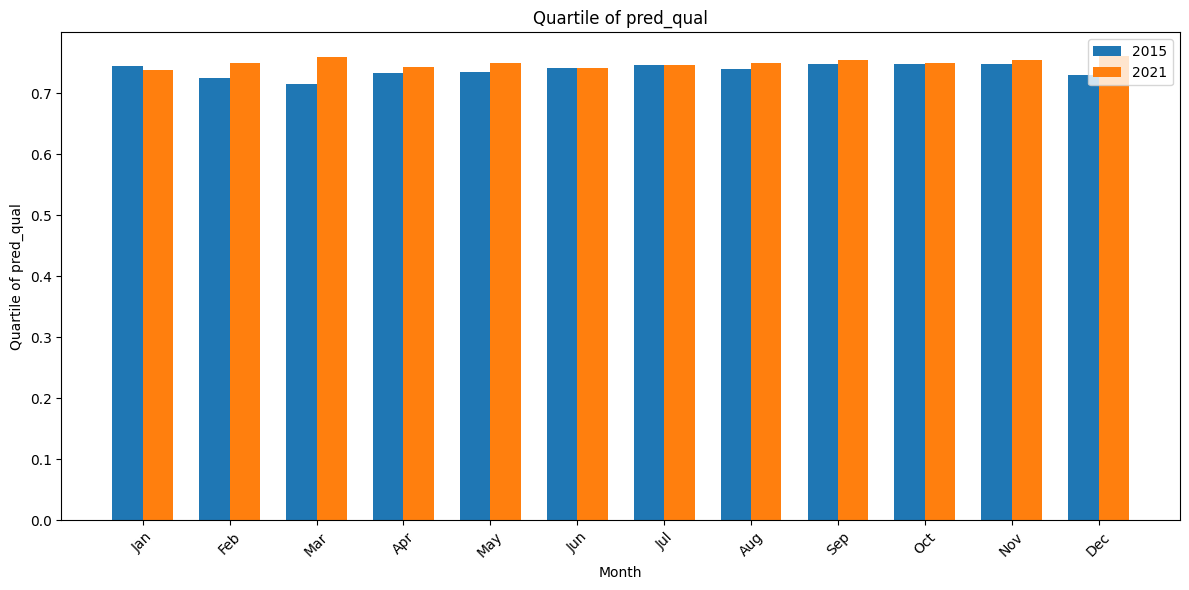

In [67]:
# Convert revision_timestamp to datetime object
df_revisions['revision_timestamp'] = pd.to_datetime(df_revisions['revision_timestamp'])

# Filter data for the specified years
df_year_1 = df_revisions[df_revisions['revision_timestamp'].dt.year == year1]
df_year_2 = df_revisions[df_revisions['revision_timestamp'].dt.year == year2]

# Group by month and calculate the selected agg or quartile of pred_qual for each year
if quartile == 0:
    monthly_data_1 = df_year_1.groupby(df_year_1['revision_timestamp'].dt.to_period('M'))['pred_qual'].agg('mean')
    monthly_data_2 = df_year_2.groupby(df_year_2['revision_timestamp'].dt.to_period('M'))['pred_qual'].agg('mean')
    y_label = 'Quartile of pred_qual'
else:
    monthly_data_1 = df_year_1.groupby(df_year_1['revision_timestamp'].dt.to_period('M'))['pred_qual'].quantile(quartile)
    monthly_data_2 = df_year_2.groupby(df_year_2['revision_timestamp'].dt.to_period('M'))['pred_qual'].quantile(quartile)
    y_label = 'Quartile of pred_qual Monthly'
    
%matplotlib inline

# Plot side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(monthly_data))
bar1 = ax.bar(index, monthly_data_1, bar_width, label=str(year1))
bar2 = ax.bar([i + bar_width for i in index], monthly_data_2, bar_width, label=str(year2))
ax.set_xlabel('Month')
ax.set_ylabel(y_label)
ax.set_title(y_label)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(monthly_data_1.index.strftime('%b'))
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Then create data visualizations using different types of charts and proposing approaches to filtering and aggregating data.

In [68]:
# TODO: Build the data analysis and visualization per instructions above

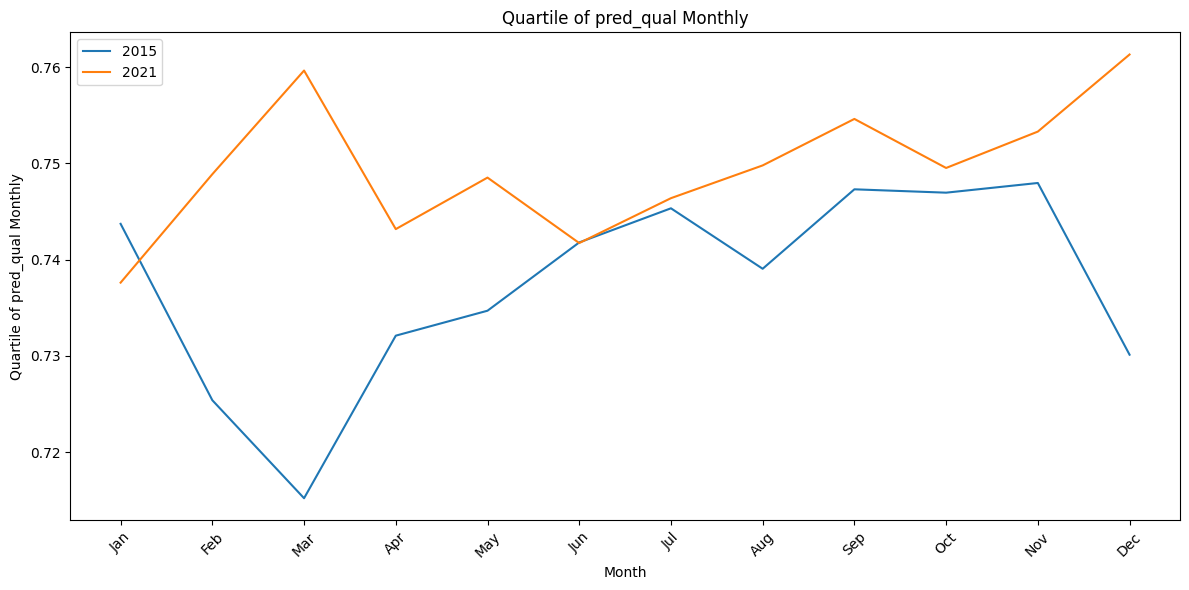

In [69]:
# Convert PeriodIndex to strings, extracting only the month
monthly_data_1.index = monthly_data_1.index.strftime('%b')
monthly_data_2.index = monthly_data_2.index.strftime('%b')
ylabel = 'Quartile of pred_qual Monthly'
%matplotlib inline

# Plot line chart for the first year and overlay line chart for the second year
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_1.index, monthly_data_1.values, label=str(year1))
plt.plot(monthly_data_2.index, monthly_data_2.values, label=str(year2))
plt.xlabel('Month')
plt.ylabel(ylabel)
plt.title(ylabel)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Future Analyses

In [ ]:
# Additional patterns I'd like to explore include: 
# Outliers - I'm curious about investigating extreme values and the cause behind 
# them whether it's caused by errors or interesting cases.


In [9]:
# TODO: Describe what additional patterns you might want to explore and visualize in the data (and why). You don't know have to know how to do the analyses.